<a href="https://colab.research.google.com/github/Lavanya363/Wine-quality-prediction/blob/main/wine_quality_prediction_using_different_models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

# importing dataset

In [2]:
df = pd.read_csv('/content/WineQT.csv')

# explory data analysis (EDA)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
df.shape

(1143, 13)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [12]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

# assigning dependent(y) and independent(x) variables

In [13]:
#assigning features
x = df.drop(['quality'],axis=1)
y = df['quality']

# splitting the data

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state =23)

In [15]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((857, 12), (286, 12), (857,), (286,))

# model selection (RFR)

In [16]:
model = RandomForestRegressor()
model.fit(x_train , y_train)

RandomForestRegressor()

# metrics

In [17]:
y_pred = model.predict(x_test).astype('int32')

In [18]:
y_pred.shape , x_test.shape

((286,), (286, 12))

In [19]:
accuracy_score(y_pred,y_test)

0.486013986013986

In [20]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   3,   6,   1,   0,   0],
       [  0,   7, 102,   4,   1,   0],
       [  0,   3,  77,  33,   2,   0],
       [  0,   0,   5,  33,   1,   0],
       [  0,   0,   0,   6,   1,   0]])

In [21]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.23      0.30      0.26        10
           5       0.53      0.89      0.67       114
           6       0.43      0.29      0.34       115
           7       0.20      0.03      0.05        39
           8       0.00      0.00      0.00         7

    accuracy                           0.49       286
   macro avg       0.23      0.25      0.22       286
weighted avg       0.42      0.49      0.42       286



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# model selection by svc

In [22]:
x = df.drop(['quality'],axis=1)
y = df['quality']

In [23]:
x.shape

(1143, 12)

In [24]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [25]:
x

array([[-0.52157961,  0.93933222, -1.36502663, ..., -0.57365783,
        -0.96338181, -1.73561799],
       [-0.29259344,  1.94181282, -1.36502663, ...,  0.1308811 ,
        -0.59360107, -1.73346186],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.04525363,
        -0.59360107, -1.73130573],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ..., -0.45623467,
         0.05351522,  1.70125196],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  0.60057372,
         0.70063152,  1.70340809],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  0.30701583,
        -0.22382033,  1.70772035]])

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,stratify = y,random_state=23)

In [27]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((800, 12), (343, 12), (800,), (343,))

In [28]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train)

SVC()

In [29]:
y_pred = svc.predict(x_test)

In [30]:
y_pred.shape

(343,)

In [31]:
y_pred

array([5, 7, 6, 5, 6, 6, 5, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 5, 7, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 5, 7, 5, 6, 5, 6, 7, 6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 7, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5,
       6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6,
       5, 5, 5, 6, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 7, 5, 5, 5, 6, 7, 5, 5,
       5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6,
       5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6,

In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.77      0.69      0.72       162
           6       0.67      0.59      0.62       157
           7       0.30      0.54      0.39        24
           8       0.00      0.00      0.00         0

    accuracy                           0.63       343
   macro avg       0.29      0.30      0.29       343
weighted avg       0.69      0.63      0.65       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# for accuracy retrain the model

In [33]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [34]:
# we have the quality values start from the 3 to 8
#arrange this as follows
3,4,5, - 0
6,7,8, -1

(6, 7, 8, -1)

In [35]:
df['quality'].replace(to_replace = [3,4,5],value=0,inplace=True)
df['quality'].replace(to_replace = [6,7,8],value=1,inplace=True)

In [36]:
Y = df['quality']

In [37]:
x_train , x_test , Y_train ,Y_test = train_test_split(x,Y,test_size=0.3,random_state=23)

In [38]:
x_train.shape , x_test.shape ,Y_train.shape ,Y_test.shape

((800, 12), (343, 12), (800,), (343,))

In [39]:
svc = SVC()

In [40]:
svc.fit(x_train , Y_train)

SVC()

In [41]:
y_pred1 = svc.predict(x_test)

In [42]:
y_pred1

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [43]:
print(classification_report(y_pred1 , Y_test))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       151
           1       0.79      0.78      0.78       192

    accuracy                           0.76       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.76      0.76      0.76       343



# visualization

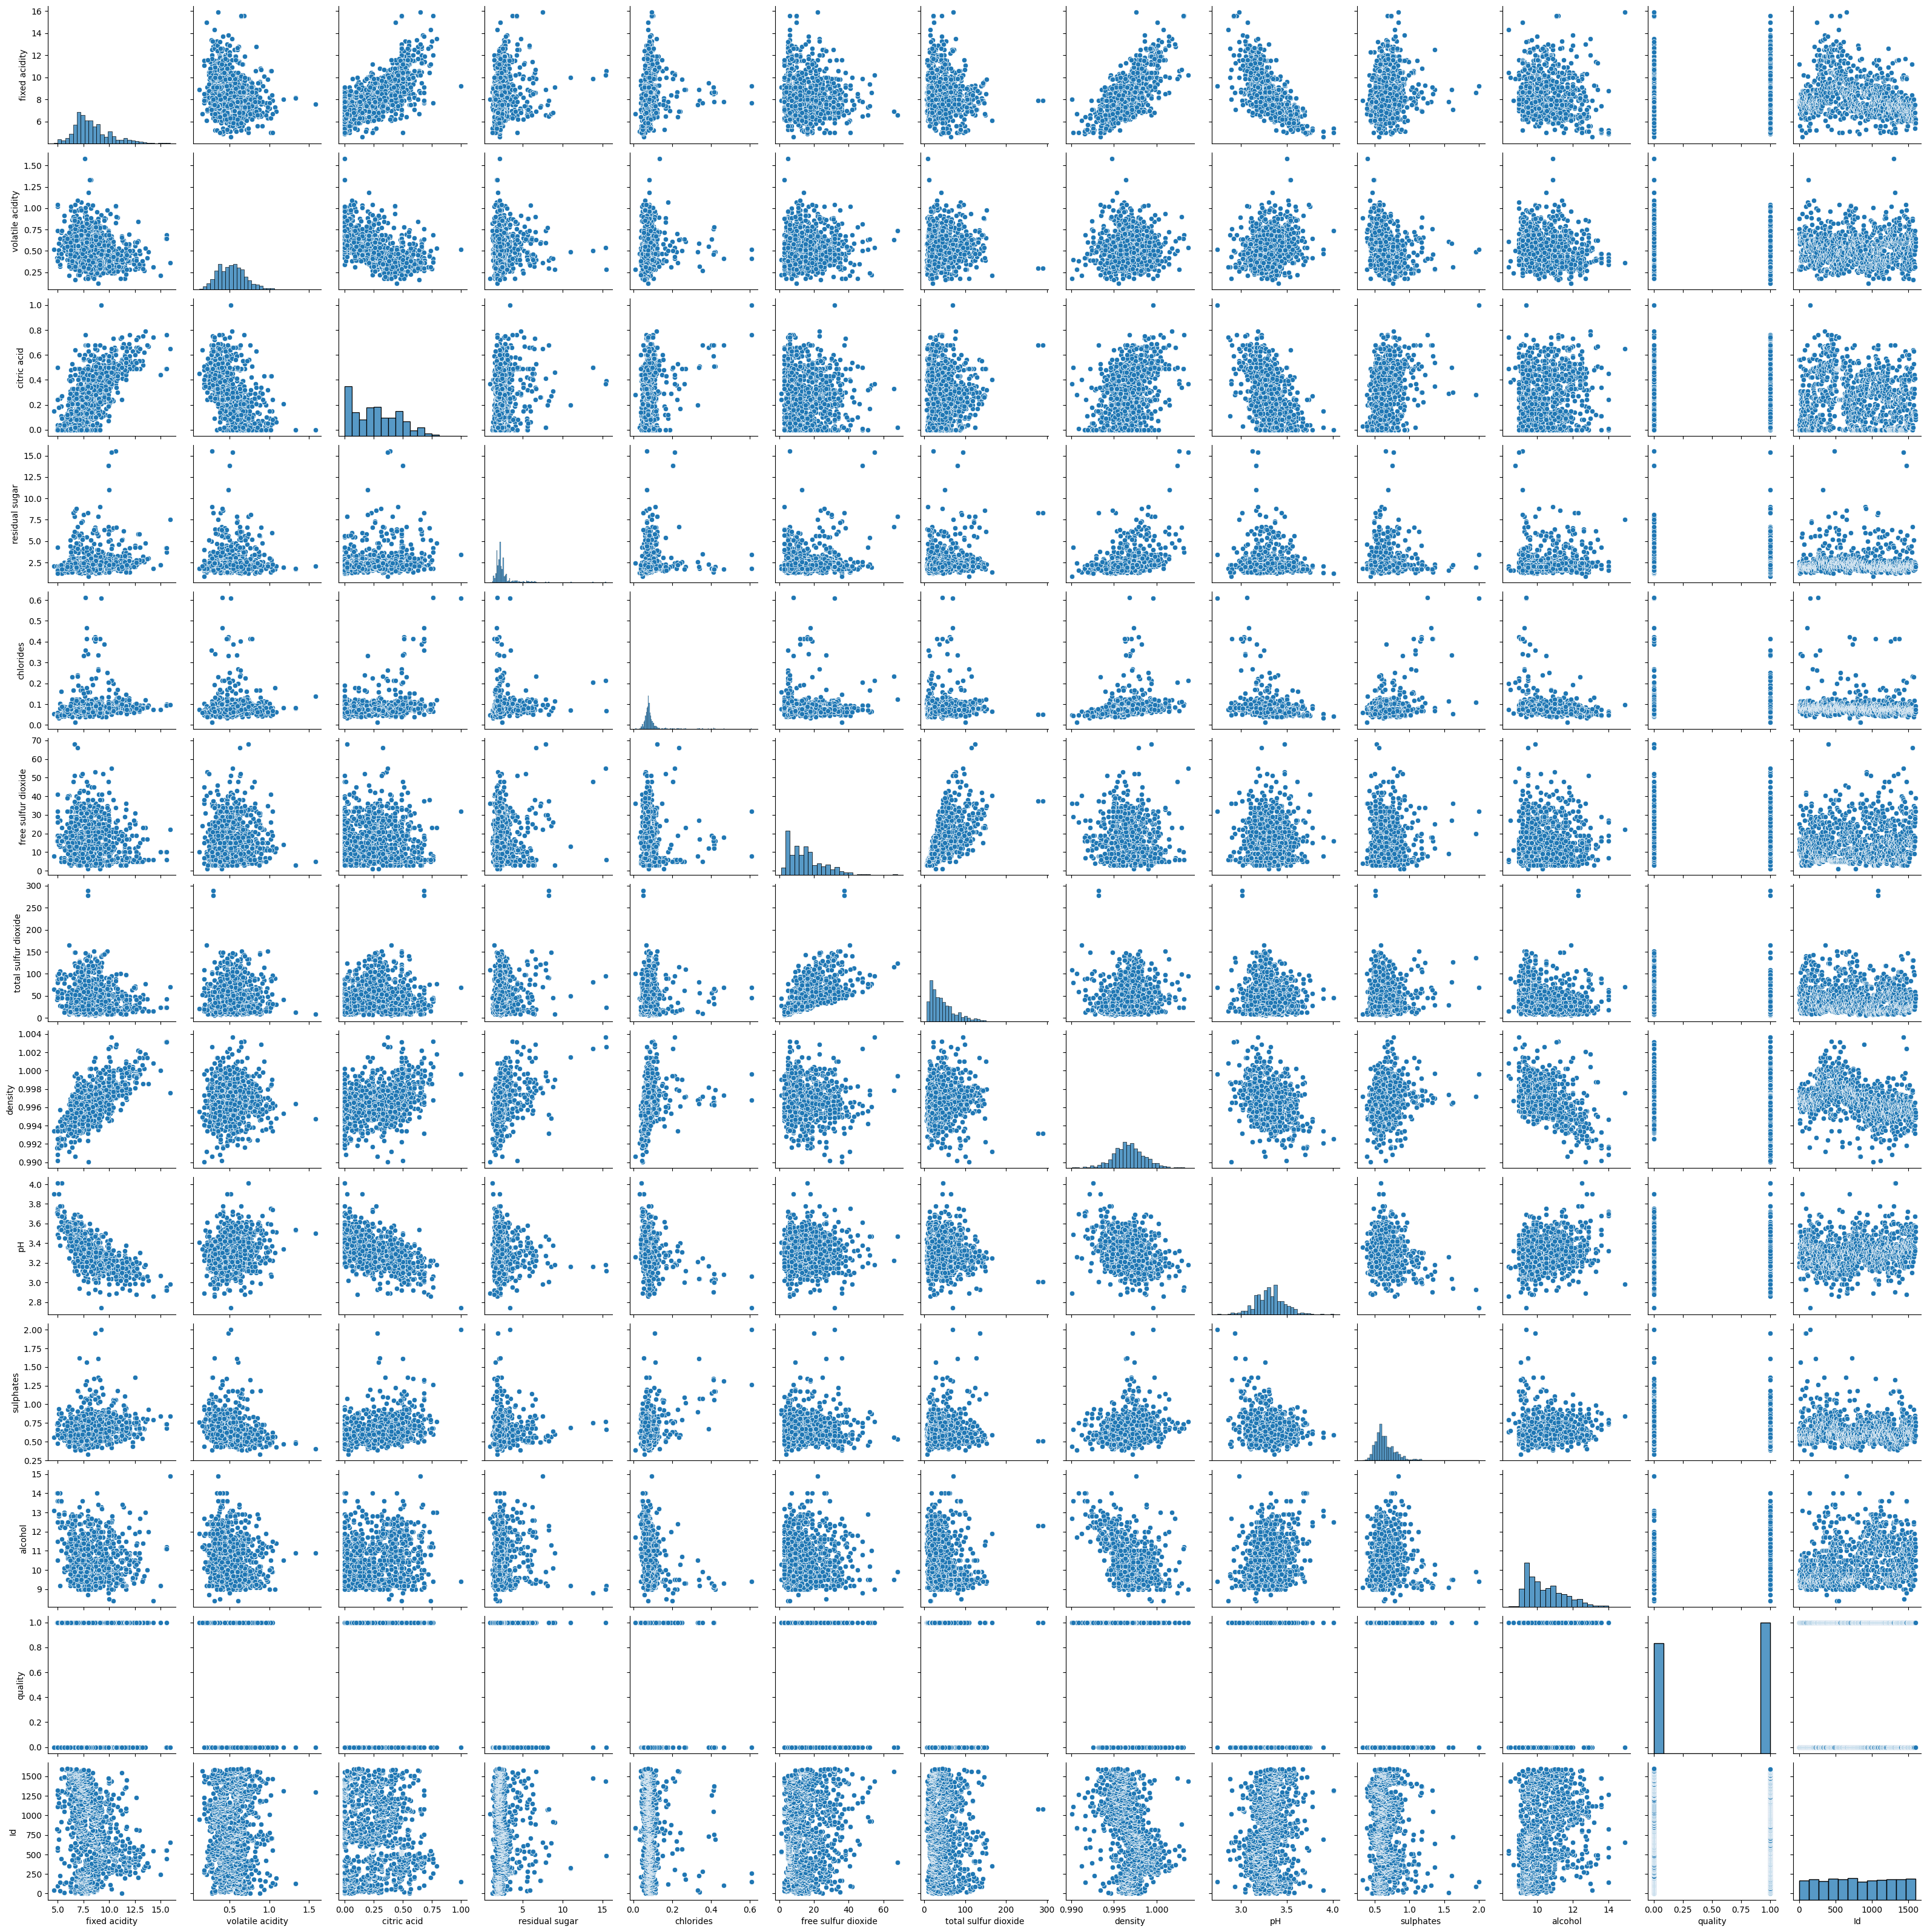

In [44]:
sns.pairplot(df)

In [45]:
fd = df.head(10)

<Axes: >

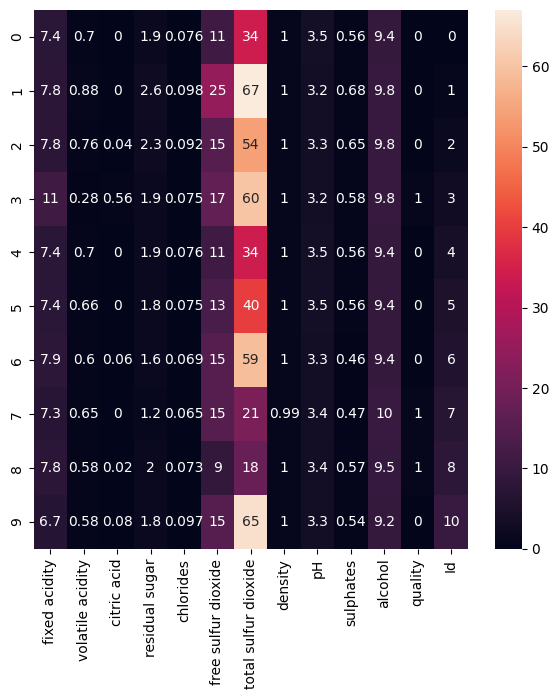

In [46]:
plt.figure(figsize=(7,7))
sns.heatmap(fd,annot=True)

<Axes: xlabel='quality', ylabel='count'>

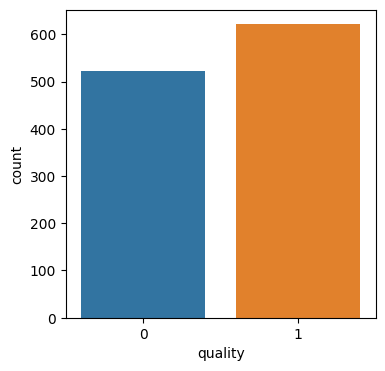

In [47]:
plt.figure(figsize=(4,4))
sns.countplot(x='quality',data=df)

# future prediction

In [48]:
df_data =  df.sample(1)

In [49]:
df_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
151,7.8,0.735,0.08,2.4,0.092,10.0,41.0,0.9974,3.24,0.71,9.8,1,214


In [50]:
df_data.shape

(1, 13)

In [51]:
x_data = df_data.drop(['quality'],axis=1)

In [52]:
x_data = sc.fit_transform(x_data)

In [53]:
y_pred_data = svc.predict(x_data)

In [54]:
y_pred_data

array([1])